In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)

import sys
import os
sys.path.insert(0,'..')

from util import read_data_in_dense_matrix, eval_prediction, store_dense_matrix_to_submission
from baselines import impute_by_svd, impute_by_mean

data_dir = '../../data/'

In [2]:
(train_matrix, test_matrix), (is_train, is_test) = read_data_in_dense_matrix(os.path.join(data_dir, 'data_train.csv'), n_col=1000, n_row=10000, test_size=0.2)

In [4]:
thre_candidates = [1e-8, 1e-5, 0.01, 0.9]
best_thre_iter = 999
best_thre = -1

for thre in thre_candidates:
    rmse_dict = {}
    for iter in range(50):
        if iter == 0:
            prediction = impute_by_svd(train_matrix, is_train, 1, svd_keep_thre=thre, start_from=None)
        else:
            prediction = impute_by_svd(train_matrix, is_train, 1, svd_keep_thre=thre, start_from=prediction)

        rmse = eval_prediction(prediction, test_matrix, is_test)
        rmse_dict[iter] = rmse
    best_iter = np.array(list(rmse_dict.values())).argmin()
    if rmse_dict[best_iter] < best_thre_iter:
        best_thre_iter = rmse_dict[best_iter]
        best_thre = thre
        
print(best_thre)

0.01


In [5]:
rmse_dict = {}

for iter in range(50):
    if iter == 0:
        prediction = impute_by_svd(train_matrix, is_train, 1, svd_keep_thre=best_thre, start_from=None)
    else:
        prediction = impute_by_svd(train_matrix, is_train, 1, svd_keep_thre=best_thre, start_from=prediction)

    rmse = eval_prediction(prediction, test_matrix, is_test)
    print(rmse)
    rmse_dict[iter] = rmse

1.0227932057571028
1.0166884970620256
1.0126997762090204
1.0099912788676608
1.0080931485269156
1.006728721665415
1.0057278738841642
1.004981831378108
1.0044186269970081
1.003989219806345
1.0036593370220173
1.0034045049647873
1.0032069226251388
1.0030534364558046
1.002934194063537
1.002841728423342
1.0027703221576356
1.002715558228528
1.0026739972853673
1.0026429426661512
1.0026202670711668
1.002604283276093
1.002593646714779
1.0025872814033285
1.0025843231458038
1.002584075661562
1.0025859764611786
1.002589570137569
1.0025944873399482
1.0026004281332217
1.00260714876329
1.0026144510832353
1.0026221740698087
1.002630186990417
1.0026383838796002
1.0026466790591022
1.0026550034931274
1.002663301814617
1.0026715298926512
1.00267965283773
1.0026876433625438
1.0026954804322252
1.0027031481510034
1.0027106348424348
1.0027179322885331
1.0027250350996466
1.0027319401921404
1.0027386463551557
1.0027451538911003
1.0027514643172761


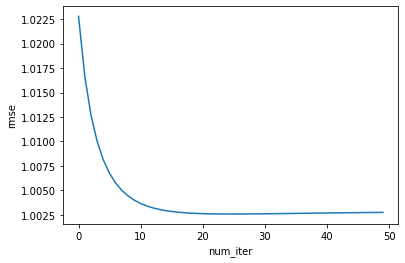

In [6]:
import matplotlib.pyplot as plt
plt.plot(rmse_dict.values())
plt.ylabel('rmse')
plt.xlabel('num_iter')
plt.savefig('../imgs/svd_curve.jpg', bbox_inches='tight')
plt.show()

In [7]:
best_iter = np.array(list(rmse_dict.values())).argmin()
best_iter

25

In [9]:
data_matrix, is_provided = read_data_in_dense_matrix(os.path.join(data_dir, 'data_train.csv'), n_col=1000, n_row=10000, test_size=None)
prediction = impute_by_svd(data_matrix, is_provided, best_iter, svd_keep_thre=best_thre, start_from=None)
store_dense_matrix_to_submission(os.path.join(data_dir, 'sampleSubmission.csv'), os.path.join(data_dir, 'mysub.csv'), prediction)


Loading requests specified by submission samples...
Storing 1176952 records for submission as requested...
